In [1]:
import json
import numpy as np
from glob import glob

In [2]:
path = './data'
nsteps = 20

In [3]:
d2oe = np.loadtxt(open(f'{path}/d2oe.dat'))

In [4]:
x = range(nsteps + 1)
dspn = [json.load(open(f'{path}/d2oe{i}-dspn.json')) for i in x]
ispn = [json.load(open(f'{path}/d2oe{i}-ispn.json')) for i in x]

In [5]:
dlength = np.array([np.mean([data[cell]['dend']['length'] for cell in data]) for data in dspn])
dlength_std = np.array([np.std([data[cell]['dend']['length'] for cell in data]) for data in dspn])

In [6]:
ilength = np.array([np.mean([data[cell]['dend']['length'] for cell in data]) for data in ispn])
ilength_std = np.array([np.std([data[cell]['dend']['length'] for cell in data]) for data in ispn])

In [7]:
dbranch = np.array([np.mean([data[cell]['dend']['nbranch'] for cell in data]) for data in dspn])
dbranch_std = np.array([np.std([data[cell]['dend']['nbranch'] for cell in data]) for data in dspn])

In [8]:
ibranch = np.array([np.mean([data[cell]['dend']['nbranch'] for cell in data]) for data in ispn])
ibranch_std = np.array([np.std([data[cell]['dend']['nbranch'] for cell in data]) for data in ispn])

In [9]:
dterm = np.array([np.mean([data[cell]['dend']['nterm'] for cell in data]) for data in dspn])
dterm_std = np.array([np.std([data[cell]['dend']['nterm'] for cell in data]) for data in dspn])

In [10]:
iterm = np.array([np.mean([data[cell]['dend']['nterm'] for cell in data]) for data in ispn])
iterm_std = np.array([np.std([data[cell]['dend']['nterm'] for cell in data]) for data in ispn])

In [11]:
dstem = np.array([np.mean([data[cell]['dend']['nstem'] for cell in data]) for data in dspn])
dstem_std = np.array([np.std([data[cell]['dend']['nstem'] for cell in data]) for data in dspn])

In [12]:
istem = np.array([np.mean([data[cell]['dend']['nstem'] for cell in data]) for data in ispn])
istem_std = np.array([np.std([data[cell]['dend']['nstem'] for cell in data]) for data in ispn])

In [13]:
import matplotlib.pyplot as plt

In [14]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.
    
    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = np.array(colorsys.rgb_to_hls(*mc.to_rgb(c)))
    return colorsys.hls_to_rgb(c[0],1-amount * (1-c[1]),c[2])

In [15]:
dcolor = 'deepskyblue'
icolor = 'royalblue'
dcolor_light = lighten_color(dcolor)
icolor_light = lighten_color(icolor)

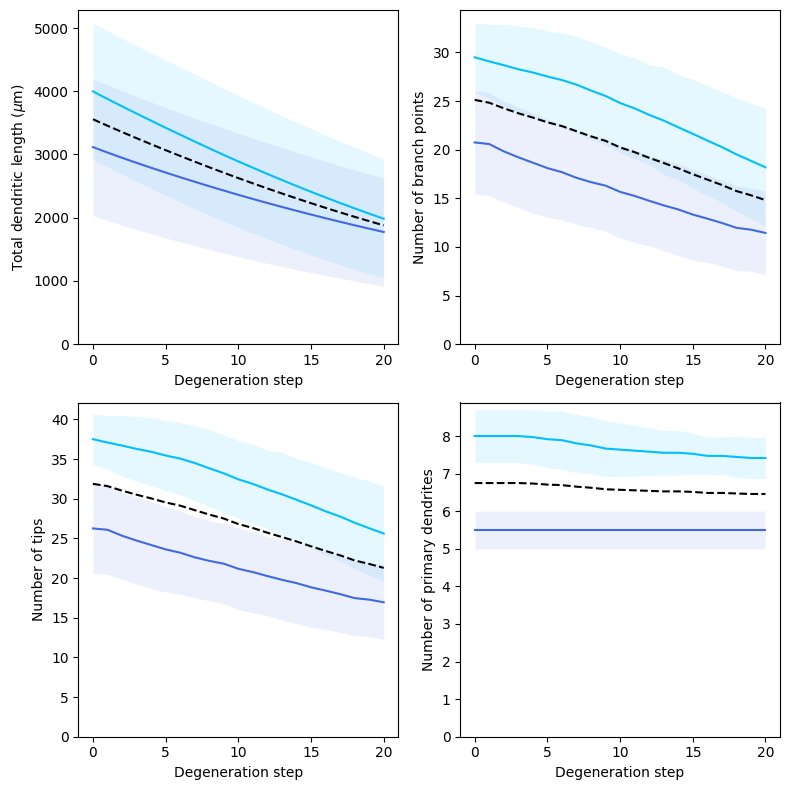

In [16]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1)
dy, iy = dlength, ilength
dyerr, iyerr = dlength_std, ilength_std
ax.fill_between(x, dy - dyerr, dy + dyerr, color=dcolor_light, edgecolor='w', alpha=0.2)
ax.fill_between(x, iy - iyerr, iy + iyerr, color=icolor_light, edgecolor='w', alpha=0.2)
ax.plot(x, dy, color=dcolor)
ax.plot(x, iy, color=icolor)
ax.plot(x, (dy + iy)/2, 'k--')
ax.set_ylim(bottom=0)
ax.set_ylabel('Total dendritic length ($\mu$m)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 2)
dy, iy = dbranch, ibranch
dyerr, iyerr = dbranch_std, ibranch_std
ax.fill_between(x, dy - dyerr, dy + dyerr, color=dcolor_light, edgecolor='w', alpha=0.2)
ax.fill_between(x, iy - iyerr, iy + iyerr, color=icolor_light, edgecolor='w', alpha=0.2)
ax.plot(x, dy, color=dcolor)
ax.plot(x, iy, color=icolor)
ax.plot(x, (dy + iy)/2, 'k--')
ax.set_ylim(bottom=0)
ax.set_ylabel('Number of branch points')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 3)
dy, iy = dterm, iterm
dyerr, iyerr = dterm_std, iterm_std
ax.fill_between(x, dy - dyerr, dy + dyerr, color=dcolor_light, edgecolor='w', alpha=0.2)
ax.fill_between(x, iy - iyerr, iy + iyerr, color=icolor_light, edgecolor='w', alpha=0.2)
ax.plot(x, dy, color=dcolor)
ax.plot(x, iy, color=icolor)
ax.plot(x, (dy + iy)/2, 'k--')
ax.set_ylim(bottom=0)
ax.set_ylabel('Number of tips')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 4)
dy, iy = dstem, istem
dyerr, iyerr = dstem_std, istem_std
ax.fill_between(x, dy - dyerr, dy + dyerr, color=dcolor_light, edgecolor='w', alpha=0.2)
ax.fill_between(x, iy - iyerr, iy + iyerr, color=icolor_light, edgecolor='w', alpha=0.2)
ax.plot(x, dy, color=dcolor)
ax.plot(x, iy, color=icolor)
ax.plot(x, (dy + iy)/2, 'k--')
ax.set_ylim(bottom=0)
ax.set_ylabel('Number of primary dendrites')
ax.set_xlabel('Degeneration step')

fig.tight_layout()

In [17]:
age9m = 17 #15

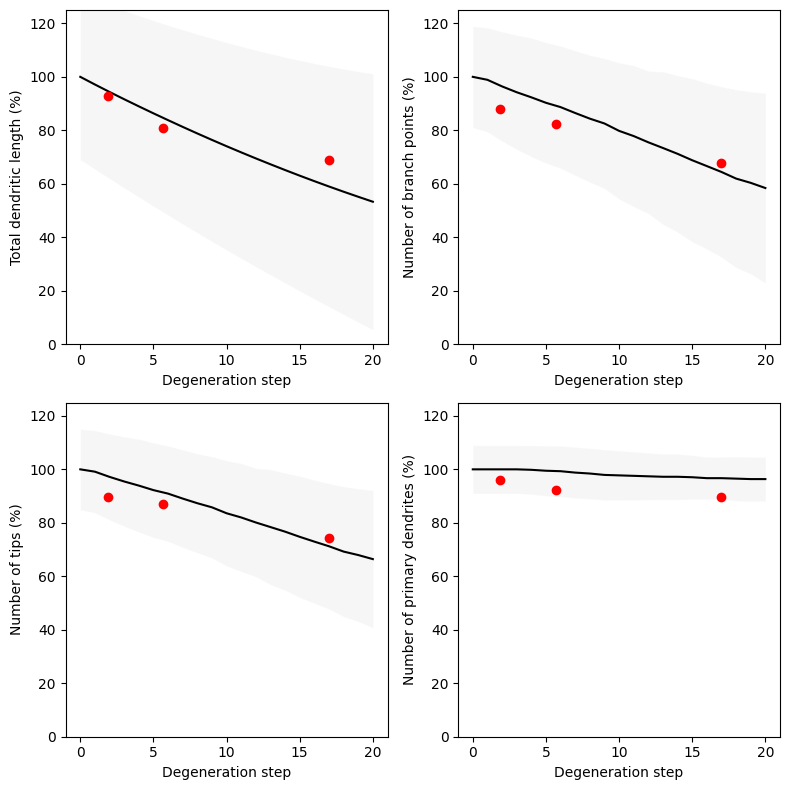

In [18]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1)
dy = dlength / dlength[0]
iy = ilength / ilength[0]
y = (dy + iy) / 2 * 100
dyerr = dlength_std / dlength
iyerr = ilength_std / ilength
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,4]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Total dendritic length (%)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 2)
dy = dbranch / dbranch[0]
iy = ibranch / ibranch[0]
y = (dy + iy) / 2 * 100
dyerr = dbranch_std / dbranch
iyerr = ibranch_std / ibranch
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,3]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Number of branch points (%)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 3)
dy = dterm / dterm[0]
iy = iterm / iterm[0]
y = (dy + iy) / 2 * 100
dyerr = dterm_std / dterm
iyerr = iterm_std / iterm
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,2]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Number of tips (%)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 4)
dy = dstem / dstem[0]
iy = istem / istem[0]
y = (dy + iy) / 2 * 100
dyerr = dstem_std / dstem
iyerr = istem_std / istem
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,1]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Number of primary dendrites (%)')
ax.set_xlabel('Degeneration step')

fig.tight_layout()

In [19]:
dlength = np.array([np.mean([data[cell]['dend']['length'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])
dlength_std = np.array([np.std([data[cell]['dend']['length'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])

In [20]:
ilength = np.array([np.mean([data[cell]['dend']['length'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])
ilength_std = np.array([np.std([data[cell]['dend']['length'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])

In [21]:
dbranch = np.array([np.mean([data[cell]['dend']['nbranch'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])
dbranch_std = np.array([np.std([data[cell]['dend']['nbranch'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])

In [22]:
ibranch = np.array([np.mean([data[cell]['dend']['nbranch'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])
ibranch_std = np.array([np.std([data[cell]['dend']['nbranch'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])

In [23]:
dterm = np.array([np.mean([data[cell]['dend']['nterm'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])
dterm_std = np.array([np.std([data[cell]['dend']['nterm'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])

In [24]:
iterm = np.array([np.mean([data[cell]['dend']['nterm'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])
iterm_std = np.array([np.std([data[cell]['dend']['nterm'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])

In [25]:
dstem = np.array([np.mean([data[cell]['dend']['nstem'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])
dstem_std = np.array([np.std([data[cell]['dend']['nstem'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in dspn])

In [26]:
istem = np.array([np.mean([data[cell]['dend']['nstem'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])
istem_std = np.array([np.std([data[cell]['dend']['nstem'] for cell in data if ('var0' in cell or 'var1' in cell or 'var2' in cell)]) for data in ispn])

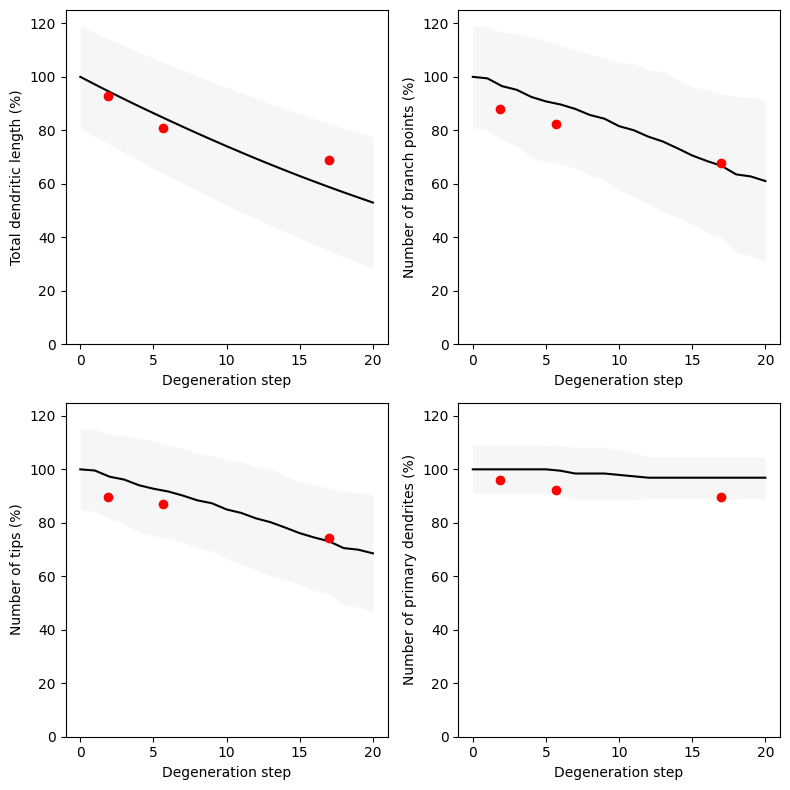

In [27]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2, 2, 1)
dy = dlength / dlength[0]
iy = ilength / ilength[0]
y = (dy + iy) / 2 * 100
dyerr = dlength_std / dlength
iyerr = ilength_std / ilength
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,4]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Total dendritic length (%)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 2)
dy = dbranch / dbranch[0]
iy = ibranch / ibranch[0]
y = (dy + iy) / 2 * 100
dyerr = dbranch_std / dbranch
iyerr = ibranch_std / ibranch
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,3]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Number of branch points (%)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 3)
dy = dterm / dterm[0]
iy = iterm / iterm[0]
y = (dy + iy) / 2 * 100
dyerr = dterm_std / dterm
iyerr = iterm_std / iterm
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,2]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Number of tips (%)')
ax.set_xlabel('Degeneration step')

ax = fig.add_subplot(2, 2, 4)
dy = dstem / dstem[0]
iy = istem / istem[0]
y = (dy + iy) / 2 * 100
dyerr = dstem_std / dstem
iyerr = istem_std / istem
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,1]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Number of primary dendrites (%)')
ax.set_xlabel('Degeneration step')

fig.tight_layout()

In [28]:
dsholl = np.array([np.mean([np.max(data[cell]['dend']['sholl']['crossings']) for cell in data]) for data in dspn])
dsholl_std = np.array([np.std([np.max(data[cell]['dend']['sholl']['crossings']) for cell in data]) for data in dspn])

In [29]:
isholl = np.array([np.mean([np.max(data[cell]['dend']['sholl']['crossings']) for cell in data]) for data in ispn])
isholl_std = np.array([np.std([np.max(data[cell]['dend']['sholl']['crossings']) for cell in data]) for data in ispn])

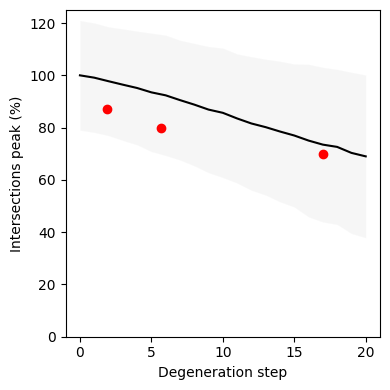

In [30]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(1, 1, 1)
dy = dsholl / dsholl[0]
iy = isholl / isholl[0]
y = (dy + iy) / 2 * 100
dyerr = dsholl_std / dsholl
iyerr = isholl_std / isholl
yerr = (dyerr + iyerr) / 2 * 100
ax.fill_between(x, y - yerr, y + yerr, color='lightgrey', edgecolor='w', alpha=0.2)
ax.plot(x, y, 'k')
xoe = d2oe[:,0] / 9 * age9m
yoe = d2oe[:,6]
ax.plot(xoe, yoe, 'ro')
ax.set_ylim(bottom=0, top=125)
ax.set_ylabel('Intersections peak (%)')
ax.set_xlabel('Degeneration step')

fig.tight_layout()